In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

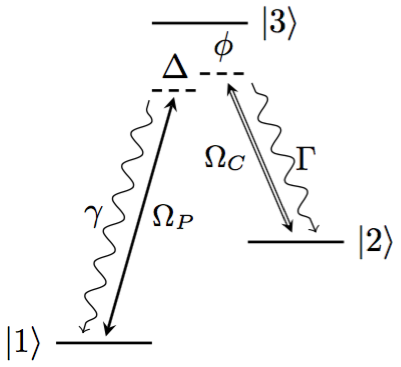

In [2]:
one, two, three = three_level_basis()
sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig13 = one * three.dag()
sig23 = two * three.dag()
sig12 = one * two.dag()

Image("fig/EIT_levels.png")

In [3]:
# Loop over the detuning Delta and generate rho and chi

# constants based on Jenkins EIT masters thesis
# It seems like the values they quote aren't right. They don't match the code.
gamma = 5  # decay rate on probe transition
Gamma = 0.1  # decay rate on control transition
gamma_c = 0.05  # coherence decay rate
deltaC = 0  # control field detuning

omegaP = 0.01  # Rabi freq. for pump
omegaC = 0.2  # Rabi freq. for control



# collapse operators
c1 = np.sqrt(gamma)*sig13  # 1-3 coherence decay (probe transition)
c2 = np.sqrt(Gamma)*sig23  # 2-3 coherence decay (control transition)
c3 = np.sqrt(gamma_c)*sig12  # ground state coherence decay
collapse = [c1,c2,c3]

deltalist = np.linspace(-3,3,301)
#deltalist = [1e-15]
rho_33 = []
chi = []

for deltaP in deltalist:
    H = omegaP*(sig13+sig13.dag()) + omegaC*(sig23+sig23.dag()) + deltaC*(sig33 - sig22) + (-deltaP)*(sig33 - sig11)
    rho_ss = steadystate(H,collapse)
    # prob.append(expect(sig33.dag(),rho_ss)) # t his also works
    rho_33.append(rho_ss[2,2])  # jenkins approach
    chi.append(expect(sig13,rho_ss))

In [6]:
H

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 3.    0.    0.01]
 [ 0.    0.    0.2 ]
 [ 0.01  0.2  -3.  ]]

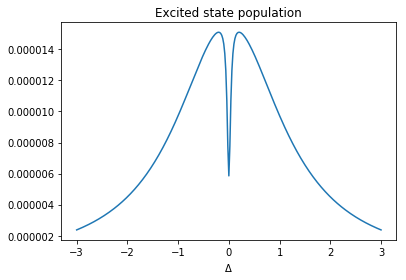

In [4]:
plt.plot(deltalist,np.real(rho_33))
plt.title("Excited state population")
plt.xlabel("$\Delta$")

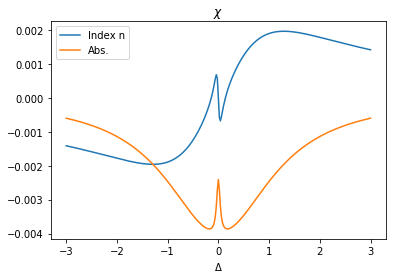

In [5]:
plt.plot(deltalist,np.real(chi),label="Index n")
plt.plot(deltalist,np.imag(chi),label="Abs.")
plt.legend()
plt.title("$\chi$")
plt.xlabel("$\Delta$")

TODO: compare to Lucas' EIT paper and see why there is a difference.
FWIW, the sign of index n appears wrong here, it should be sloping up at the EIT window.